In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Raw Data Processing
Extracting the commits count from the main dataset, to facilitate analysis

In [21]:
#input_file = "../../rs_usage/metadata/metadata.csv"
#metadata = pd.read_csv(input_file, low_memory=False)
#metadata.set_index('Unnamed: 0', inplace=True)
#commits_count = metadata["commits_on_default"]
#with open('../data/commits_count.npy', 'wb') as f:
#    np.save(f, commits_count.values)

In [22]:
commits_count = np.load('../data/commits_counts.npy')

In [23]:
len(commits_count)

52684

In [8]:
threshold = 95
percentiles_cutoff = np.percentile(commits_count, q=threshold)
commits_below_95_perc = commits_count[commits_count<percentiles_cutoff]
commits_above_95_perc = commits_count[commits_count>percentiles_cutoff]

Text(0.5, 1.0, 'Commits on Default Branch \n Above 95% percentile')

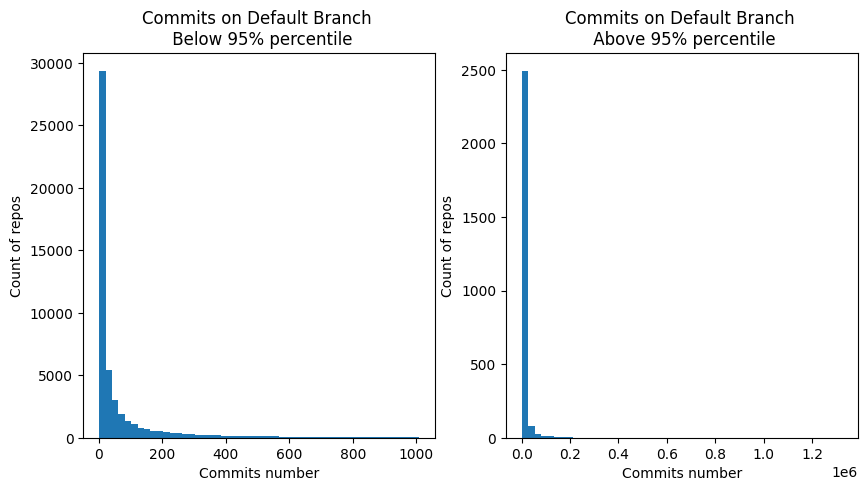

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(commits_below_95_perc, bins=50)
ax[0].set_xlabel("Commits number")
ax[0].set_ylabel("Count of repos")
ax[0].set_title(f"Commits on Default Branch \n Below {threshold}% percentile")
ax[1].hist(commits_above_95_perc, bins=50)
ax[1].set_xlabel("Commits number")
ax[1].set_ylabel("Count of repos")
ax[1].set_title(f"Commits on Default Branch \n Above {threshold}% percentile")


## Correlation between activity span and commits number

In [10]:
lifespan_months = np.load('../data/lifespan_months.npy')
lifespan_positive = lifespan_months[lifespan_months>=0]

commits_positive = commits_count[lifespan_months>=0]
commits_positive_above_perc = commits_positive[commits_positive>percentiles_cutoff]
commits_positive_below_perc = commits_positive[commits_positive<percentiles_cutoff]

lifespan_below_95_perc = lifespan_positive[commits_positive<percentiles_cutoff]
lifespan_above_95_perc = lifespan_positive[commits_positive>percentiles_cutoff]

In [17]:
x = lifespan_below_95_perc
y = commits_positive_below_perc
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

Text(0.5, 1.0, 'Relation between lifespan and commit number\n Above 95% percentile')

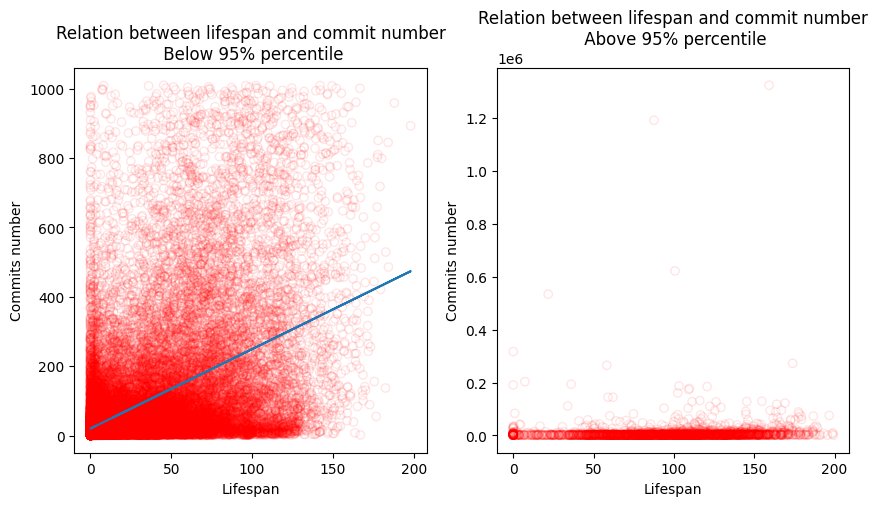

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(lifespan_below_95_perc, commits_positive_below_perc, alpha=0.1, facecolors='none', edgecolors='r')
ax[0].set_ylabel("Commits number")
ax[0].set_xlabel("Lifespan")
ax[0].set_title(f"Relation between lifespan and commit number\n Below {threshold}% percentile")
ax[0].plot(x, poly1d_fn(x))
ax[1].scatter(lifespan_above_95_perc, commits_positive_above_perc, alpha=0.1, facecolors='none', edgecolors='r')
ax[1].set_ylabel("Commits number")
ax[1].set_xlabel("Lifespan")
ax[1].set_title(f"Relation between lifespan and commit number\n Above {threshold}% percentile")

Text(0.5, 1.0, '2D Histogram Heatmap')

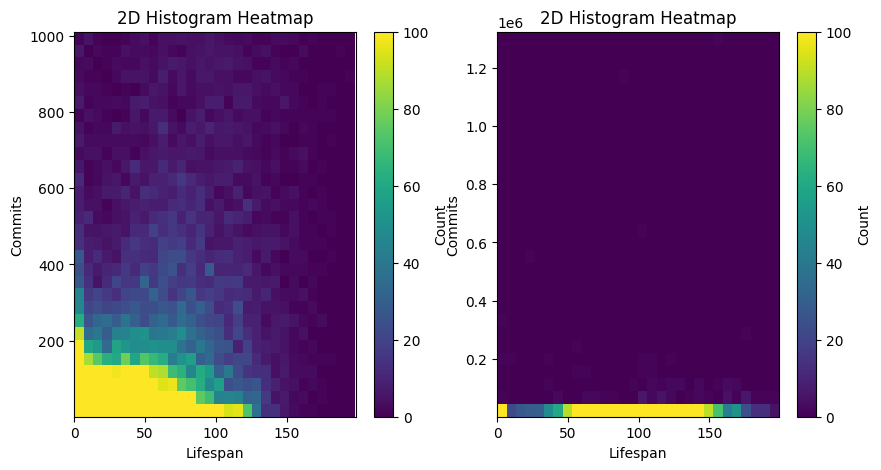

In [92]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True)

counts, xedges, yedges, im = ax[0].hist2d(lifespan_below_95_perc, commits_positive_below_perc, bins=30, cmap='viridis', vmin=0, vmax=100)

# Add a colorbar to interpret the scale
plt.colorbar(im, ax=ax[0], label='Count')
ax[0].set_xlabel('Lifespan')
ax[0].set_ylabel('Commits')
ax[0].set_title('Below 95 percentile Heatmap')


counts, xedges, yedges, im = ax[1].hist2d(lifespan_above_95_perc, commits_positive_above_perc, bins=30, cmap='viridis', vmin=0, vmax=100)
plt.colorbar(im, ax=ax[1], label='Count')
ax[1].set_xlabel('Lifespan')
ax[1].set_ylabel('Commits')
ax[1].set_title('Above 95 percentile Heatmap')